In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Loading Dataset

In [117]:
path = '../Data_Source/spam.csv'

# Read the CSV file
df = pd.read_csv(path, encoding='latin-1') [['v1', 'v2']]

# New Column Names
df.columns = ['label', 'text' ]

# ham and spam encoding
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})

print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


# Data Inspection

In [118]:
df.shape

(5572, 2)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# Feature Engineering

In [120]:
# Extract numerical features
df['text_length'] = df.text.apply(len)
df['num_words'] = df.text.apply(lambda x: len(x.split()))
df['num_digits'] = df.text.apply(lambda x: sum(c.isdigit() for c in x))

# Define Target and Features

In [121]:
X = df[['text_length', 'num_words', 'num_digits']]
y = df['label' ]

# Train Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Standardization

In [123]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes Model (for Continuous data)

In [124]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [125]:
# Prediction
y_pred_gnb = gnb.predict(X_test_scaled)

## Evaluation

In [126]:
# Accuracy
accuracy_score(y_test, y_pred_gnb)

0.9802690582959641

In [127]:
# confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[953,  12],
       [ 10, 140]], dtype=int64)

In [128]:
# classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [129]:
# f1 score
f1_score(y_test, y_pred_gnb)

0.9271523178807947

# Multinomial Naive Bayes (for Text Data)

## Vectorization

In [130]:
# Convert text data into word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

## Convert to TF-IDF representation

In [131]:
tfidf_transformer = TfidfTransformer() # it will calculate the frequency of words 
X_tfife = tfidf_transformer.fit_transform(X_counts)

# Train Test Split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_tfife, df.label, test_size=0.2, random_state=42)

## Model Building

In [133]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [134]:
# prediction
y_pred_mnb = mnb.predict(X_test)

## Evaluation

In [135]:
# accuracy
accuracy_score(y_test, y_pred_mnb)

0.968609865470852

In [136]:
# confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
cm_mnb

array([[965,   0],
       [ 35, 115]], dtype=int64)

In [137]:
# classification report
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [138]:
# f1 score
f1_score(y_test, y_pred_mnb)

0.8679245283018868

# Bernoulli Naive Bayes (For Binary Features)

In [139]:
# Convert text into binary presence/absence of important words
important_words = ["free", "win", "offer", "money", "urgent"]
for word in important_words:
    df[word] = df['text'].apply(lambda x: 1 if word in x.lower() else 0)

In [140]:
# Define features and target
X = df[important_words]
y = df['label']

In [141]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [142]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [143]:
# prediction 
y_pred_bnb = bnb.predict(X_test)

## Evaluation

In [144]:
# accuracy
accuracy_score(y_test, y_pred_bnb)

0.895067264573991

In [145]:
# confusion matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
cm_bnb

array([[929,  36],
       [ 81,  69]], dtype=int64)

In [146]:
# classification report
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115



In [147]:
# f1 score
f1_score(y_test, y_pred_bnb)

0.5411764705882353


# Comparison

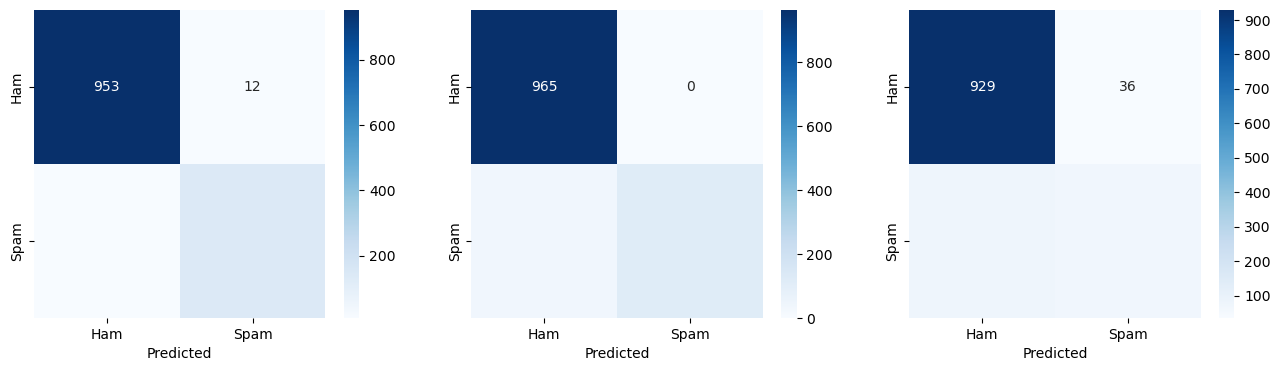

In [152]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.heatmap(
    cm_gnb, annot=True, fmt='d', cmap='Blues', 
    xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']
)
plt.xlabel('Predicted')

plt.subplot(1, 3, 2)
sns.heatmap(
    cm_mnb, annot=True, fmt='d', cmap='Blues', 
    xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']
)
plt.xlabel('Predicted')

plt.subplot(1, 3, 3)
sns.heatmap(
    cm_bnb, annot=True, fmt='d', cmap='Blues', 
    xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
)
plt.xlabel('Predicted')

plt.show()